<a href="https://colab.research.google.com/github/mirianosoriov/ChallegeG8-Analisis_de_Ventas-Tiendas_Alura_Store/blob/main/Proyecto_AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 **Análisis Comparativo de Tiendas de Alura Store: Recomendación de Venta**

📌 Elaborado por: Mirian Lucero Osorio Valencia - 📅 Mayo 2025

<div align="center">
  <img src="https://avatars.githubusercontent.com/u/108864439?v=4" width="80">
</div>

Este proyecto fue desarrollado como parte de la especialización en Ciencia de Datos del programa Oracle Next Education – G8 👩🏻‍💻.

---



# **1.-🔎 Introducción**

El Sr. Juan, dueño de la cadena Alura Store, está evaluando la posibilidad de vender una de sus cuatro tiendas para emprender un nuevo proyecto. Para tomar esta decisión de forma informada y estratégica, se realizó un análisis integral de rendimiento que incluye la facturación total, comportamiento de ventas por categoría, satisfacción de clientes, desempeño de productos y costos logísticos. Este informe sintetiza los hallazgos más relevantes y ofrece una recomendación justificada sobre qué tienda debería venderse.

<div align="center">
  <img src="https://raw.githubusercontent.com/mirianosoriov/ChallegeG8-Analisis_de_Ventas-Tiendas_Alura_Store/main/Challenge1.png" width="700">
</div>



# **2.-📈 Desarrollo del Análisis.**

In [17]:
# Importamos las librerías que usaremos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib import ticker
from IPython.display import HTML, display

In [18]:
#Importamos la data de las 4 tiendas
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# **2.1.-💰 Análisis de facturación.**

In [19]:
urls = {'Tienda 1': url, 'Tienda 2': url2, 'Tienda 3': url3, 'Tienda 4': url4}
tiendas = {k: pd.read_csv(v) for k, v in urls.items()}
df_fact = pd.DataFrame([(k, v['Precio'].sum()) for k, v in tiendas.items()],
                      columns=['Tienda', 'Facturación Total']).sort_values('Facturación Total', ascending=False)  #Creamos el DataFrame de facturación

css = """<style>.tabla-facturacion {border-collapse: collapse; width: 60%; margin: 20px auto; font-family: Arial; box-shadow: 0 0 5px rgba(0,0,0,0.1)}
.tabla-facturacion th {background: #2c3e50; color: white; padding: 10px; text-align: center}
.tabla-facturacion td {padding: 8px; border-bottom: 1px solid #ddd; text-align: left}
.destacado {color: #FFA500; font-weight: bold}.moneda {text-align: right; font-family: 'Courier New'}</style>"""

html = css + """<div style='text-align:center;margin-bottom:20px'><h2 style='color:#2c3e50'>Facturación por Tienda</h2></div>
<table class='tabla-facturacion'><tr><th>Posición</th><th>Tienda</th><th>Facturación Total</th></tr>"""
html += "".join(f"<tr><td>{i}</td><td class='{'destacado' if i==1 else ''}'>{r['Tienda']}</td><td class='moneda {'destacado' if i==1 else ''}'>${r['Facturación Total']:,.0f}</td></tr>"
         for i, (_, r) in enumerate(df_fact.iterrows(), 1)) + "</table>"
display(HTML(html))

top = df_fact.iloc[0]
print(f"\nLa tienda que más vendió fue {top['Tienda']} con una facturación de ${top['Facturación Total']:,.0f}")

Posición,Tienda,Facturación Total
1,Tienda 1,"$1,150,880,400"
2,Tienda 2,"$1,116,343,500"
3,Tienda 3,"$1,098,019,600"
4,Tienda 4,"$1,038,375,700"



La tienda que más vendió fue Tienda 1 con una facturación de $1,150,880,400


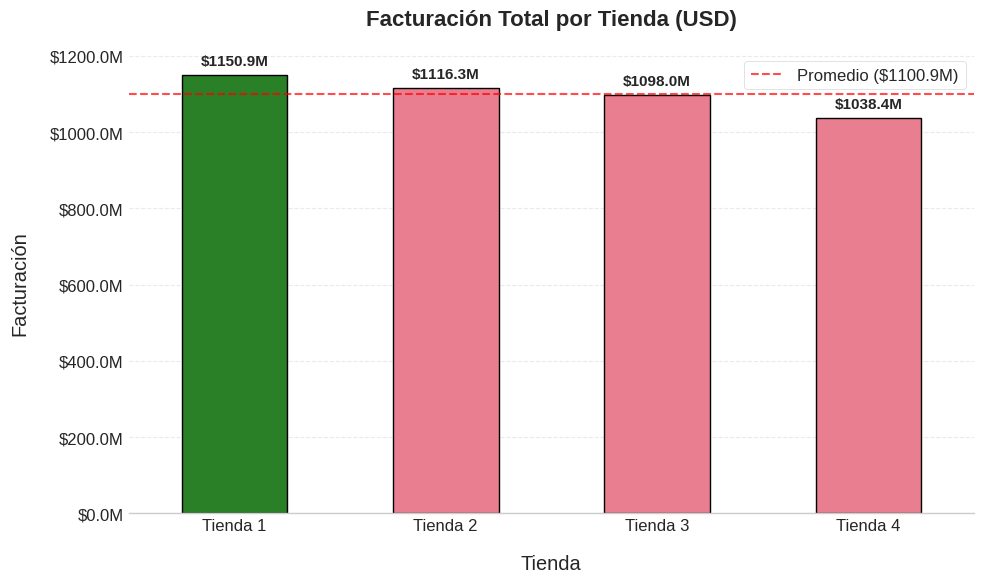

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
df_facturacion = df_fact.copy().sort_values('Facturación Total', ascending=False)
fig, ax = plt.subplots()                                 # Creamos gráfico de barras
barplot = sns.barplot(
    x='Tienda',
    y='Facturación Total',
    data=df_facturacion,
    order=df_facturacion['Tienda'],
    width=0.5,
    saturation=0.8,
    edgecolor='black',
    linewidth=1,
    ax=ax
)
plt.title('Facturación Total por Tienda (USD)', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Tienda', labelpad=15)
plt.ylabel('Facturación', labelpad=15)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))
for p in barplot.patches:
    barplot.annotate(
        f'${p.get_height()/1e6:.1f}M',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )
barplot.patches[0].set_facecolor('#298026')
barplot.patches[0].set_edgecolor('#000000')
promedio = df_facturacion['Facturación Total'].mean()        # Línea de promedio
ax.axhline(
    y=promedio,
    color='red',
    linestyle='--',
    linewidth=1.5,
    alpha=0.7,
    label=f'Promedio (${promedio/1e6:.1f}M)'
)
plt.legend(loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine(left=True)
plt.tight_layout()
plt.show()


📌 **- Comentario:**
Las tres categorías principales se repiten en todas las tiendas, lo que sugiere una estrategia homogénea de surtido. Sin embargo, Tienda 3 destaca en ventas de muebles y electrónicos, lo que la posiciona bien en las categorías de mayor peso. Curiosamente, Tienda 4 lidera en la venta de juguetes (338), lo cual puede indicar un perfil de público distinto o una oportunidad de nicho. A pesar de este dato, su baja facturación sugiere que estas ventas no se traducen en ingresos competitivos, posiblemente debido a precios bajos en esta categoría o a márgenes reducidos.

---



# **2.2.-📦 Categorías de Productos Más Vendidos.**

In [21]:
tienda1 = tienda
dfs = [tienda1, tienda2, tienda3, tienda4]
for i, df in enumerate(dfs, 1):
    df['Tienda'] = f'Tienda {i}'
ventas = pd.concat(dfs).groupby(['Tienda', 'Categoría del Producto']).size().unstack(fill_value=0)

# Estilos CSS y HTML
css = """<style>.tabla-ventas{border-collapse:collapse;width:90%;margin:20px auto;font-family:Arial;box-shadow:0 0 5px rgba(0,0,0,0.1)}.tabla-ventas th{background:#2c3e50;color:white;padding:12px;text-align:center}.tabla-ventas td{padding:10px;border:1px solid #ddd;text-align:center}.titulo-principal{color:#2c3e50;text-align:center;margin:25px 0;font-size:22px}.categoria-destacada{background-color:#FFF2CC;font-weight:bold}.numero-ventas{font-family:'Courier New'}</style>"""
html = css + """<div class='titulo-principal'><h2>Ventas por Categoría en Cada Tienda</h2></div><table class='tabla-ventas'><tr><th>Tienda</th><th>Categoría</th><th>Ventas</th><th>Categoría</th><th>Ventas</th><th>Categoría</th><th>Ventas</th></tr>"""
for tienda in ventas.index:
    top3 = ventas.loc[tienda].sort_values(ascending=False).head(3)
    html += f"<tr><td rowspan='1' style='background-color:#f5f5f5;font-weight:bold'>{tienda}</td>"
    for i, (cat, venta) in enumerate(top3.items()):
        clase = "categoria-destacada" if i == 0 else ""
        html += f"<td class='{clase}'>{cat}</td><td class='numero-ventas {clase}'>{venta:,}</td>"
    html += "</tr>"
html += "</table><div style='text-align:center;margin-top:20px;font-style:italic'>Se muestran las 3 categorías con mayor número de ventas por tienda</div>"
display(HTML(html))


Tienda,Categoría,Ventas,Categoría,Ventas,Categoría,Ventas
Tienda 1,Muebles,465,Electrónicos,448,Juguetes,324
Tienda 2,Muebles,442,Electrónicos,422,Juguetes,313
Tienda 3,Muebles,499,Electrónicos,451,Juguetes,315
Tienda 4,Muebles,480,Electrónicos,451,Juguetes,338


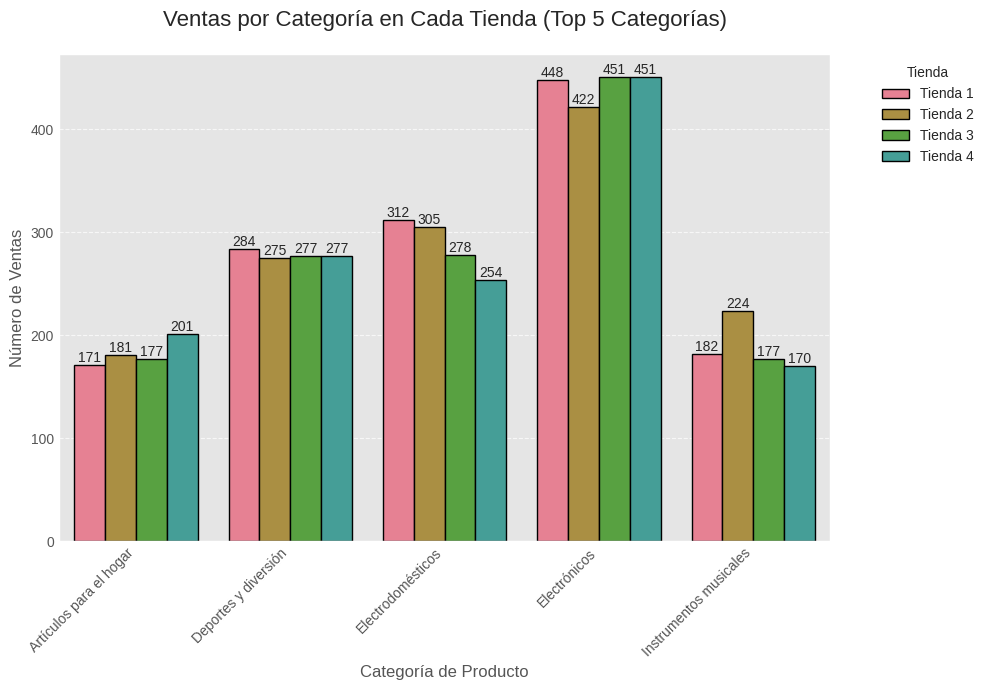

In [22]:
plt.style.use('ggplot')
sns.set_palette("husl")
ventas = pd.concat([tienda1,tienda2,tienda3,tienda4]).groupby(['Tienda','Categoría del Producto']).size().reset_index(name='Ventas')   # Agrupamos por Tienda y Categoría
ventas_filt = ventas[ventas['Categoría del Producto'].isin(ventas['Categoría del Producto'].value_counts().nlargest(5).index)]         # Top 5 categorías más vendidas

plt.figure(figsize=(10,7))
ax = sns.barplot(x='Categoría del Producto', y='Ventas', hue='Tienda', data=ventas_filt, errorbar=None, estimator=sum, edgecolor='black', linewidth=1)
[ax.annotate(f'{int(p.get_height()):,}', (p.get_x()+p.get_width()/2.,p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points', fontsize=10) for p in ax.patches if p.get_height()>0]

plt.title('Ventas por Categoría en Cada Tienda (Top 5 Categorías)', fontsize=16, pad=20)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

📌 **- Comentario:**
Observamos que las tres categorías principales se repiten en todas las tiendas, lo que sugiere una estrategia homogénea de surtido. Sin embargo, Tienda 3 destaca en ventas de muebles y electrónicos, lo que la posiciona bien en las categorías de mayor peso. Curiosamente, Tienda 4 lidera en la venta de juguetes (338), lo cual puede indicar un perfil de público distinto o una oportunidad de nicho. A pesar de este dato, su baja facturación sugiere que estas ventas no se traducen en ingresos competitivos, posiblemente debido a precios bajos en esta categoría o a márgenes reducidos.

---



# **2.3.-⭐ Calificación Promedio por Tienda.**

In [23]:
css = """<style>.tabla-calificaciones{border-collapse:collapse;width:60%;margin:20px auto;font-family:Arial;box-shadow:0 0 5px rgba(0,0,0,0.1)}.tabla-calificaciones th{background:#2c3e50;color:white;padding:10px;text-align:center}.tabla-calificaciones td{padding:8px;border-bottom:1px solid #ddd;text-align:center}.destacado{color:#FFA500;font-weight:bold}.promedio{font-family:'Courier New'}</style>"""
tiendas = {f'Tienda {i}': df.assign(Tienda=f'Tienda {i}') for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], start=1)}

calificaciones = {n: df['Calificación'].mean() for n, df in tiendas.items()}   # Calculamos la calificación promedio por tienda
df_cal = pd.DataFrame(calificaciones.items(), columns=['Tienda', 'Calificación Promedio']).sort_values('Calificación Promedio', ascending=False)
html = css + """<div style='text-align:center;margin-bottom:20px'><h2 style='color:#2c3e50'>Calificación Promedio por Tienda</h2></div><table class='tabla-calificaciones'><tr><th>Posición</th><th>Tienda</th><th>Calificación Promedio</th></tr>"""
for i, (_, row) in enumerate(df_cal.iterrows(), 1):
    d = "destacado" if i == 1 else ""
    html += f"<tr><td>{i}</td><td class='{d}'>{row['Tienda']}</td><td class='promedio {d}'>{row['Calificación Promedio']:.3f}</td></tr>"
html += "</table>"

display(HTML(html))
mejor = df_cal.iloc[0]
print(f"\nLa tienda con mejor calificación es {mejor['Tienda']} con un promedio de {mejor['Calificación Promedio']:.2f}")


Posición,Tienda,Calificación Promedio
1,Tienda 3,4.048
2,Tienda 2,4.037
3,Tienda 4,3.996
4,Tienda 1,3.977



La tienda con mejor calificación es Tienda 3 con un promedio de 4.05


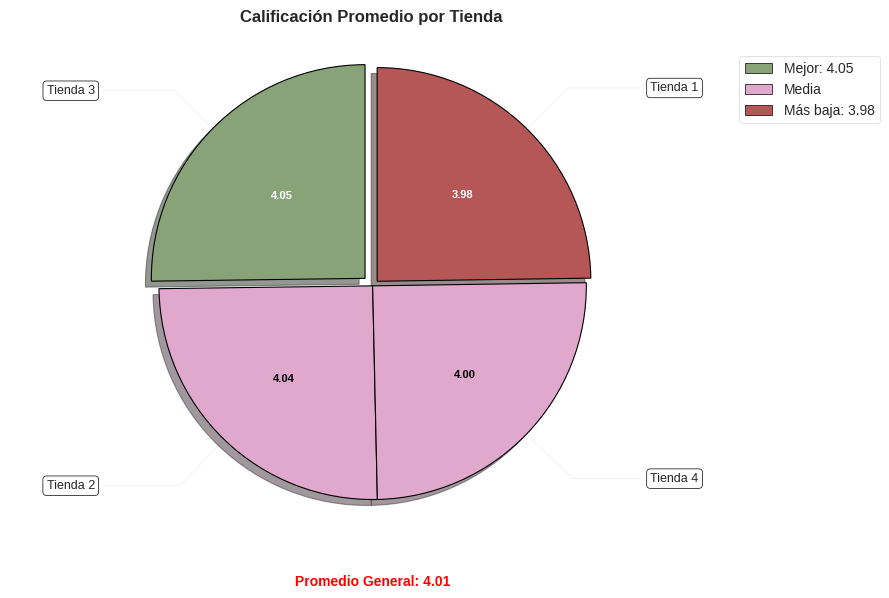

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'figure.figsize':(9,6), 'font.size':10})
df_cal = pd.concat(tiendas).groupby('Tienda')['Calificación'].mean().reset_index().sort_values('Calificación', ascending=False)  # Calculamos la calificación promedio por tienda
labels, sizes = df_cal['Tienda'].values, df_cal['Calificación'].values
max_val, min_val = sizes.max(), sizes.min()
verde, vino, rosa = '#87a377', '#b55757', '#e0a8cc'
colors = [verde if x == max_val else vino if x == min_val else rosa for x in sizes]
explode = [0.05 if x == max_val else 0.03 if x == min_val else 0 for x in sizes]
fig, ax = plt.subplots()
wedges, _ = ax.pie(sizes, explode=explode, colors=colors, shadow=True, startangle=90,
                   wedgeprops={'edgecolor':'black', 'linewidth':0.8}, pctdistance=0.8)

bbox = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y, x = np.sin(np.deg2rad(ang)), np.cos(np.deg2rad(ang))
    ha = {-1:"right", 1:"left"}[int(np.sign(x))]
    kw["arrowprops"].update({"connectionstyle":f"angle,angleA=0,angleB={ang}"})
    ax.annotate(labels[i], xy=(x,y), xytext=(1.3*np.sign(x),1.3*y), ha=ha, fontsize=9, **kw)
    ax.text(x*0.6, y*0.6, f"{sizes[i]:.2f}", ha='center', va='center',
            color='white' if colors[i] in [verde,vino] else 'black', fontweight='bold', fontsize=8)
ax.legend(handles=[Patch(facecolor=verde, edgecolor='black', label=f'Mejor: {max_val:.2f}'),
                 Patch(facecolor=rosa, edgecolor='black', label='Media'),
                 Patch(facecolor=vino, edgecolor='black', label=f'Más baja: {min_val:.2f}')],
          loc='upper left', bbox_to_anchor=(1,1), frameon=True)

plt.title('Calificación Promedio por Tienda', pad=20, fontsize=12, fontweight='bold')
ax.text(0,-1.4, f'Promedio General: {df_cal["Calificación"].mean():.2f}', ha='center', color='red', fontweight='bold', fontsize=10)
ax.axis('equal')
plt.tight_layout()
plt.show()

📌 **- Comentario:**
La satisfacción del cliente es un indicador crítico para la sostenibilidad del negocio. Tienda 3 tiene la mejor calificación (4.05), lo que sugiere altos estándares de atención, calidad de productos o experiencia de compra. Por otro lado, Tienda 1, aunque es la que más factura, tiene la calificación más baja, lo cual podría revelar problemas en el servicio postventa o en la experiencia general. Tienda 4, en este caso, se ubica por debajo del promedio, lo cual agrava aún más su débil desempeño general. Tener ingresos bajos y, al mismo tiempo, una calificación moderada disminuye su atractivo como activo dentro del portafolio de tiendas.

---



# **2.4.-📊 Productos Más y Menos Vendidos**

In [25]:
df = pd.concat(dfs)
vp = df.groupby(['Tienda', 'Producto']).agg(Ventas=('Producto', 'count'), Monto=('Precio', 'sum')).reset_index()
css = """<style>
.contenedor {display: grid; grid-template-columns: repeat(2, 1fr); gap: 15px; width: 100%}
.tabla {border-collapse: collapse; width: 100%; font-family: Arial; box-shadow: 0 0 5px rgba(0,0,0,0.1)}
.tabla th {background: #2c3e50; color: white; padding: 8px; text-align: center}
.tabla td {padding: 6px; border: 1px solid #ddd; text-align: left}
.destacado {color: #FFA500; font-weight: bold}
.moneda {text-align: right; font-family: 'Courier New'}
.cantidad {text-align: center}
.separador {border-right: 1px solid #ddd}
</style>"""
html = css + "<div class='contenedor'>"
for tienda in sorted(df['Tienda'].unique()):
    top_mas = vp[vp['Tienda'] == tienda].nlargest(5, 'Ventas').to_dict('records')      # Obtenemos los top más vendidos y los top menos vendidos
    top_menos = vp[(vp['Tienda'] == tienda) & (vp['Ventas'] > 1)].nsmallest(5, 'Ventas').to_dict('records')
    filas = []
    for i in range(5):
        destacado = "destacado" if i == 0 else ""
        mas = top_mas[i] if i < len(top_mas) else {}         # Datos de los más vendidos
        prod_mas = mas.get('Producto', '')
        ventas_mas = mas.get('Ventas', '')
        monto_mas = f"${mas.get('Monto', 0):,.0f}" if mas else ''
        menos = top_menos[i] if i < len(top_menos) else {}   # Datos de los menos vendidos
        prod_menos = menos.get('Producto', '')
        ventas_menos = menos.get('Ventas', '')
        monto_menos = f"${menos.get('Monto', 0):,.0f}" if menos else ''
        fila = f"""
        <tr>
            <td class='separador {destacado}'>{prod_mas}</td>
            <td class='cantidad'>{ventas_mas}</td>
            <td class='moneda'>{monto_mas}</td>
            <td class='separador {destacado}'>{prod_menos}</td>
            <td class='cantidad'>{ventas_menos}</td>
            <td class='moneda'>{monto_menos}</td>
        </tr>"""
        filas.append(fila)
    html += f"""
    <table class='tabla'>
        <tr><th colspan='6'>{tienda}</th></tr>
        <tr>
            <th colspan='3'>Top Más Vendidos</th>
            <th></th>
            <th colspan='3'>Top Menos Vendidos</th>
        </tr>
        <tr>
            <th class='separador'>Producto</th>
            <th class='separador'>Cantidad</th>
            <th class='separador'>Monto</th>
            <th class='separador'>Producto</th>
            <th class='separador'>Cantidad</th>
            <th>Monto</th>
        </tr>
        {"".join(filas)}
    </table>"""
display(HTML(html + "</div>"))

In [26]:
dfs = [tienda1.assign(Tienda='Tienda 1'), tienda2.assign(Tienda='Tienda 2'),
       tienda3.assign(Tienda='Tienda 3'), tienda4.assign(Tienda='Tienda 4')]
res = pd.concat(dfs).groupby(['Tienda', 'Producto']).agg(
    Ventas=('Producto', 'count'),
    Monto=('Precio', 'sum')
).reset_index()              # Agrupamos los datos por Tienda y Producto, y calculamos las ventas y el monto

html = """
<style>
.t {border-collapse:collapse; width:100%; font-family:Arial; margin:20px 0}
.t th {background:#2c3e50; color:white; padding:10px}
.t td {padding:8px; border:1px solid #ddd; text-align:left}
.mv {color:#27ae60; font-weight:bold}
.lv {color:#bf4a3f; font-weight:bold}
</style>
<h3 style='text-align:center'>Productos Destacados por Tienda</h3>
<table class='t'>
<tr><th>Tienda</th><th>Más Vendido (Ventas)</th><th>Monto</th><th>Menos Vendido (Ventas)</th><th>Monto</th></tr>
"""
for tienda in sorted(res['Tienda'].unique()):
    t = res[res['Tienda'] == tienda]
    mv = t.nlargest(1, 'Ventas').iloc[0]                # Más vendido
    lv = t.nsmallest(1, 'Ventas').iloc[0]               # Menos vendido
    html += f"""
<tr>
  <td>{tienda}</td>
  <td class='mv'>{mv['Producto']} ({mv['Ventas']})</td>
  <td>${mv['Monto']:,.0f}</td>
  <td class='lv'>{lv['Producto']} ({lv['Ventas']})</td>
  <td>${lv['Monto']:,.0f}</td>
</tr>"""
display(HTML(html + "</table>"))


Tienda,Más Vendido (Ventas),Monto,Menos Vendido (Ventas),Monto
Tienda 1,Armario (60),"$29,462,300",Auriculares con micrófono (33),"$4,730,800"
Tienda 2,Iniciando en programación (65),"$3,127,800",Juego de mesa (32),"$5,811,900"
Tienda 3,Kit de bancas (57),"$16,699,800",Bloques de construcción (35),"$1,237,200"
Tienda 4,Cama box (62),"$32,946,300",Guitarra eléctrica (33),"$25,823,100"


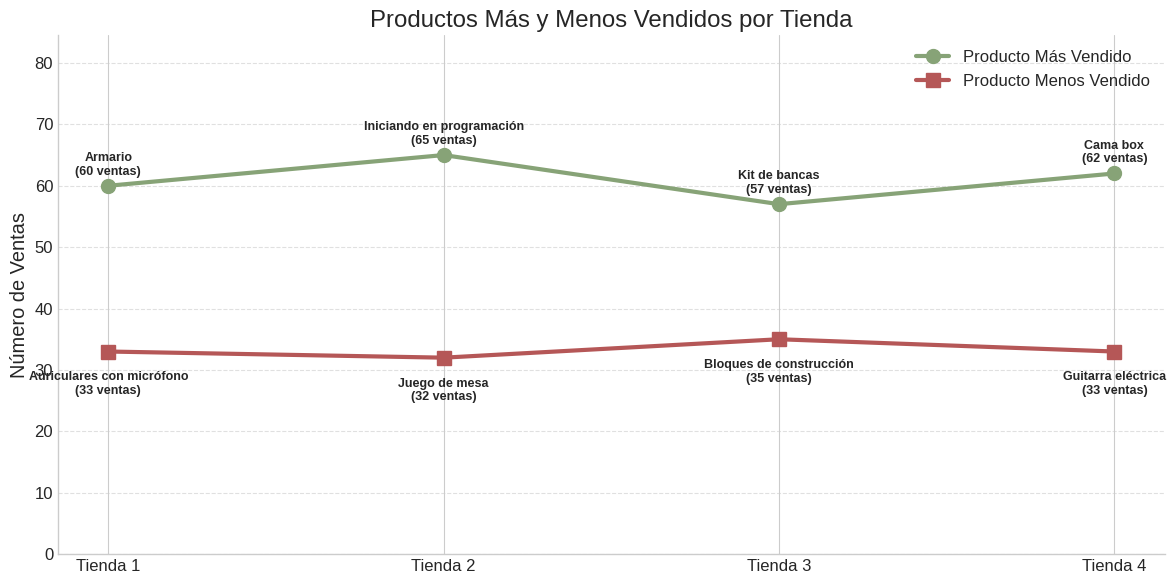

In [30]:
def cargar_tienda(url, num):
    try:
        df = pd.read_csv(url)
        return df.assign(Tienda=f'Tienda {num}')
    except FileNotFoundError:
        print(f"No se encontró la tienda {num}.csv")
        return pd.DataFrame()
datos_completos = pd.concat([tienda1, tienda2, tienda3, tienda4])
if datos_completos.empty:
    raise ValueError("Error al cargar datos - verifica las rutas")
ventas = datos_completos.groupby(['Tienda', 'Producto']).size().reset_index(name='Unidades')
maximos = ventas.loc[ventas.groupby('Tienda')['Unidades'].idxmax()].assign(Tipo='Más Vendido')    # Obtenemos los productos más y menos vendidos por tienda
minimos = ventas.loc[ventas.groupby('Tienda')['Unidades'].idxmin()].assign(Tipo='Menos Vendido')
resultados = pd.concat([maximos, minimos]).sort_values('Tienda')                                  # Concatenamos los resultados y ordenarmos por tienda

fig, ax = plt.subplots(figsize=(12, 6))
colores = {'Más Vendido': '#87a377', 'Menos Vendido': '#b55757'}
x = np.arange(len(resultados['Tienda'].unique()))
max_ventas = resultados['Unidades'].max()
for tipo, marcador in [('Más Vendido', 'o'), ('Menos Vendido', 's')]:
    datos = resultados[resultados['Tipo'] == tipo]
    ax.plot(x, datos['Unidades'], marker=marcador, markersize=10, lw=3,
            color=colores[tipo], label=f'Producto {tipo}')
for i, (_, r) in enumerate(resultados.groupby('Tienda')):
    mas, menos = r.iloc[0], r.iloc[1]
    ax.text(i, mas.Unidades + max_ventas*0.02, f"{mas.Producto}\n({mas.Unidades} ventas)",
            ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax.text(i, menos.Unidades - max_ventas*0.05, f"{menos.Producto}\n({menos.Unidades} ventas)",
            ha='center', va='top', fontsize=9, fontweight='bold')
ax.set(xticks=x, xticklabels=resultados.Tienda.unique(), ylabel='Número de Ventas',
       title='Productos Más y Menos Vendidos por Tienda', ylim=(0, max_ventas*1.3))
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', ls='--', alpha=0.6)
plt.legend(loc='upper right', framealpha=1)
plt.tight_layout()
plt.show()


📌 **- Comentario:**
Se observa una gran variabilidad entre productos más y menos vendidos. Tienda 4 presenta un patrón preocupante: su producto menos vendido (Guitarra eléctrica) es de alto valor ($25,823,100). Esto implica un riesgo de inmovilización de inventario costoso, lo cual impacta negativamente la rotación de productos y el capital de trabajo. En cambio, Tienda 2, aunque tiene un producto más vendido con bajo valor, presenta una mejor eficiencia en rotación, lo que puede compensar en términos de flujo. La rentabilidad no depende solo del valor unitario, sino también del dinamismo del inventario. En este aspecto, Tienda 4 muestra una gestión más débil.

---



# **2.5.-📊 Costo Promedio de Envío por Tienda.**

In [28]:
df_envio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Promedio de Envío': [t['Costo de envío'].mean() for t in [tienda1, tienda2, tienda3, tienda4]]
}).sort_values('Costo Promedio de Envío', ascending=False)

html = f"""<style>.tabla-envios{{border-collapse:collapse;width:50%;margin:20px auto;font-family:Arial;box-shadow:0 0 5px rgba(0,0,0,0.1)}}
.tabla-envios th{{background:#2c3e50;color:white;padding:12px;text-align:center}}.tabla-envios td{{padding:10px;border-bottom:1px solid #ddd;text-align:center}}
.destacado{{color:#bf4a3f;font-weight:bold}}.moneda{{text-align:right;font-family:'Courier New'}}
.titulo-seccion{{color:#2c3e50;text-align:center;margin:25px 0 15px 0;font-size:20px}}</style>
<div class='titulo-seccion'><h2>Costo Promedio de Envío por Tienda</h2></div>
<table class='tabla-envios'><tr><th>Posición</th><th>Tienda</th><th>Costo Promedio</th></tr>{
''.join(f"<tr><td>{i}</td><td class='{'destacado' if i==1 else ''}'>{r['Tienda']}</td>"
       f"<td class='moneda {'destacado' if i==1 else ''}'>${r['Costo Promedio de Envío']:.2f}</td></tr>"
       for i, (_, r) in enumerate(df_envio.iterrows(), 1))}
</table><div style='text-align:center;margin-top:15px;font-style:italic'>Valores calculados como promedio de todos los envíos por tienda</div>
<div style='text-align:center;margin-top:20px'><strong> La tienda con mayor costo promedio de envío es
<span style='color:#bf4a3f'>{df_envio.iloc[0]['Tienda']}</span> (${df_envio.iloc[0]['Costo Promedio de Envío']:.2f})</strong></div>"""

display(HTML(html))

Posición,Tienda,Costo Promedio
1,Tienda 1,$26018.61
2,Tienda 2,$25216.24
3,Tienda 3,$24805.68
4,Tienda 4,$23459.46


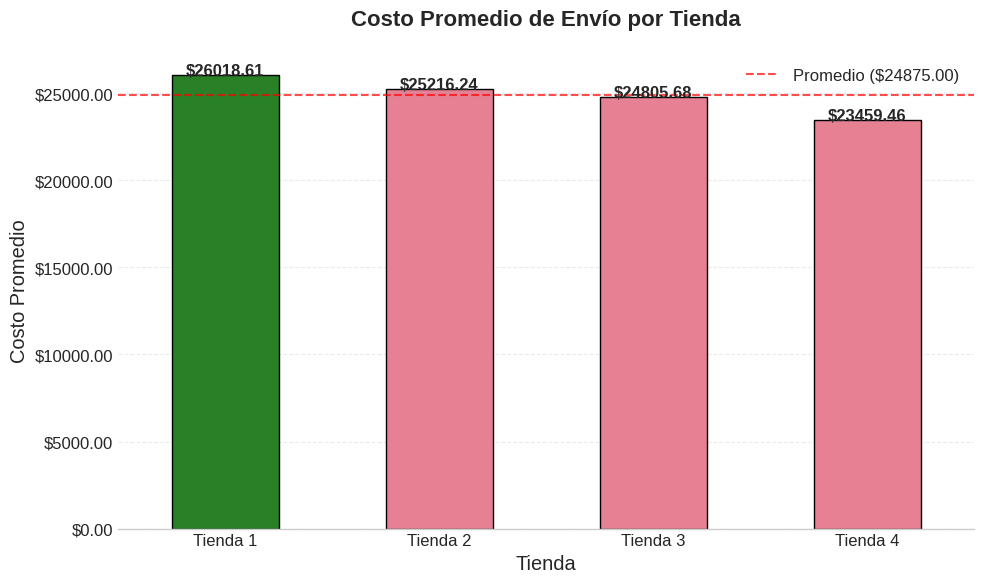

In [29]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams.update({'figure.figsize':(10,6), 'font.size':12})

# Creamos DataFrame con costo promedio de envío por tienda
df = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Promedio': [tienda1['Costo de envío'].mean(),
                      tienda2['Costo de envío'].mean(),
                      tienda3['Costo de envío'].mean(),
                      tienda4['Costo de envío'].mean()]
}).sort_values('Costo Promedio', ascending=False)
fig, ax = plt.subplots()                             # Creamos gráfico de barras
barplot = sns.barplot(x='Tienda', y='Costo Promedio', data=df, order=df['Tienda'],
                     width=0.5, edgecolor='black', linewidth=1)
plt.title('Costo Promedio de Envío por Tienda', pad=20, fontsize=16, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.2f}'))
[ax.text(i, v+0.05, f'${v:.2f}', ha='center', fontweight='bold')
 for i, v in enumerate(df['Costo Promedio'])]
barplot.patches[0].set_facecolor('#298026')
ax.axhline(y=df['Costo Promedio'].mean(), color='red', linestyle='--',
           linewidth=1.5, alpha=0.7, label=f'Promedio (${df["Costo Promedio"].mean():.2f})')
plt.legend(loc='upper right')
sns.despine(left=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


📌 **- Comentario:**
El costo logístico es un factor clave para la competitividad. La Tienda 4 tiene el menor costo promedio de envío, lo que en teoría podría ser una fortaleza. No obstante, este ahorro no se refleja en mejores resultados de facturación, satisfacción ni rotación, por lo que no representa una ventaja real. Por el contrario, Tienda 1, aunque enfrenta el mayor costo de envío, sigue liderando en ingresos, lo que sugiere que sus clientes perciben valor suficiente para compensar ese costo. Esto refuerza la idea de que los bajos costos logísticos de Tienda 4 no están siendo explotados de manera efectiva.


---





#**3.- ✅ Conclusión y Recomendación.**

Tras el análisis de los indicadores clave, podemos concluir que la Tienda 4 es la que presenta el desempeño más débil dentro del grupo, por las siguientes razones:


*   Tiene la facturación más baja entre todas las tiendas.

*   Aunque tiene una buena cantidad de ventas en juguetes, su rendimiento general no compensa otras debilidades.

*   Su calificación promedio es inferior a la de las Tiendas 2 y 3, lo cual indica menor satisfacción del cliente.

*   Sus productos menos vendidos tienen valores elevados, lo que puede reflejar dificultades para rotar inventario de alto costo.

*   Aunque cuenta con el costo de envío más bajo, esto no se traduce en una ventaja competitiva suficiente frente a las demás tiendas.

🛑 Por lo tanto, recomendamos al Sr. Juan considerar la venta de la Tienda 4, permitiéndole liberar recursos para explorar nuevos negocios con mayor potencial de éxito.

---

